In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

GIPath = "data/all_gis_islandpath_dimob_iv4.txt"
taxonomyPath = "data/microbedbv2.20190402.tsv"


In [16]:
GIdf = pd.read_csv(GIPath, sep='\t', comment='#', header=0)
taxdf= pd.read_csv(taxonomyPath, sep='\t', comment='#', header=0)
#list(GIdf.columns.values)
print(list(taxdf.columns.values))

merge = GIdf.merge(taxdf, left_on = 'Accession_number', right_on = 'rep_accnum')
print("done")

['rep_accnum', 'rep_type', 'cds_num', 'gene_num', 'rep_size', 'bioproject', 'biosample', 'species_taxid', 'org_name', 'infraspecific_name', 'taxon_id', 'superkingdom', 'phylum', 'tax_class', 'order', 'family', 'genus', 'species', 'other', 'synonyms']
done


In [17]:
##count the number of GIs of each accession
taxonToSortBy = 'species'
count = merge['rep_accnum'].value_counts().to_frame()
count.columns = ["NumGI"]

#count total number of GI bases of each accession
bases = pd.DataFrame(columns = ['Accession', 'GIBase', 'RepSize', 'Proportion', taxonToSortBy])
#count total number of GI bases in a accession
for acc in merge['rep_accnum'].unique():
    #subset
    subset = merge[merge['rep_accnum'] == acc]
    sumBases = 0
    for index, row in subset.iterrows():
        sumBases = sumBases + row['End'] - row['Start']
        repSize = row['rep_size']
        spp = row[taxonToSortBy]
        rep_type = row['rep_type']
    porportion = 100 * sumBases/repSize
    bases = bases.append(pd.DataFrame([[acc, sumBases, repSize, porportion, spp, rep_type]], columns=['Accession', 'GIBase', 'RepSize', 'Proportion',taxonToSortBy, 'rep_type']))
print("done")
#bases.to_csv('bases.tsv', sep='\t')

/home/jjia/miniconda3/envs/jupyter/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


done


In [19]:
#merge all the independent frames together
statsFrame = pd.DataFrame(columns = ['Accession'])
statsFrame['Accession'] = merge['rep_accnum'].unique()
statsFrame = statsFrame.merge(count, right_index=True, left_on = 'Accession') #[['rep_accnum','NumGI','rep_size', 'gene_num', 'genus', 'species']]
statsFrame = statsFrame.merge(bases, left_on = 'Accession', right_on = 'Accession') #[['rep_accnum','NumGI','rep_size', 'gene_num', 'genus', 'species']]
print(statsFrame)
print("done")


        Accession  NumGI  GIBase  Proportion  RepSize    rep_type  \
0     NZ_CP015164     19  365030   12.763831  2859878  chromosome   
1     NZ_CP015168     22  463598   16.493917  2810721  chromosome   
2     NZ_CP014060      7  188122    2.740311  6864988  chromosome   
3       NC_015942     12  256609    8.000151  3207552  chromosome   
4       NC_011206      5   83426    2.891678  2885038  chromosome   
5       NC_011761      6  120335    4.034842  2982397  chromosome   
6       NC_012483      8  237220    5.747505  4127356  chromosome   
7       NC_008578      1   20968    0.858099  2443540  chromosome   
8       NC_015138      9  181380    3.308544  5482170  chromosome   
9       NC_008752     16  282030    5.268859  5352772  chromosome   
10      NC_011992      7  269666    7.102879  3796573  chromosome   
11      NC_008782     16  515125   11.578819  4448856  chromosome   
12      NC_018708     11  382022    7.350910  5196935  chromosome   
13      NC_010611      8  192048  

In [ ]:
#count number of plasmids and chromsoomes each species have
repTypeFrame = pd.DataFrame(columns=[taxonToSortBy,'NumChromosome','NumPlasmid','BioSampleID'])
for spp in taxdf[taxonToSortBy].unique():
    subset = taxdf[taxdf[taxonToSortBy] == spp]
    
    plasmidCount = len(subset[subset['rep_type'] == "plasmid"][['rep_accnum']])
    chromosomeCount = len(subset[subset['rep_type'] == "chromosome"][['rep_accnum']])
    bioSampleID = ",".join(subset['biosample'].unique())

    plasmidCount = len(plasmid.index)
    chromosomeCount = len(chromosome.index)
    
    repTypeFrame = repTypeFrame.append(pd.DataFrame([[spp, chromosomeCount, plasmidCount, bioSampleID]], columns=[taxonToSortBy,'NumChromosome','NumPlasmid','BioSampleID']))
    #print(repTypeFrame)
    
#repTypeFrame = repTypeFrame[[taxonToSortBy,'NumChromosome','NumPlasmid','ChromosomeAcc','PlasmidAcc']]
print(repTypeFrame)
print("done")


In [6]:
#calculate species averages
averageFrame = pd.DataFrame(columns = [taxonToSortBy,'NumGI', 'GIBase', 'RepSize', 'Proportion'])
varianceFrame = pd.DataFrame(columns = [taxonToSortBy, 'NumGI','GIBase', 'RepSize', 'Proportion'])

eskape = ['Enterrococcus faecium', 
          'Staphylococcus aureus', 
          'Klebsiella pneumoniae', 
          'Acinetobacter baumannii', 
          'Pseudomonas aeruginosa',
         'Enterobacter']

for spp in statsFrame[taxonToSortBy].unique():
    #subset\
    #print(spp)
    #if any(spp in s for s in eskape):
    #    print("true")
    
    subset = statsFrame[statsFrame[taxonToSortBy] == spp]
    
    avgCount = subset['NumGI'].mean()
    avgBases = subset['GIBase'].mean()
    avgRepSize = subset['RepSize'].mean()
    avgProportion = subset['Proportion'].mean()
    
    #varCount = subset['NumGI'].std()
    #varBases =subset['GIBase'].std()
    #varRepSize = subset['RepSize'].std()
    #varProportion = subset['Proportion'].std()

    averageFrame = averageFrame.append(pd.DataFrame([[spp, avgCount, avgBases, avgRepSize, avgProportion]], columns=[taxonToSortBy,'NumGI', 'GIBase', 'RepSize', 'Proportion']))
    #varianceFrame = varianceFrame.append(pd.DataFrame([[spp, varCount, varBases, varRepSize, varProportion]], columns=['Species','NumGI', 'GIBase', 'RepSize', 'Proportion']))

print("done")

done


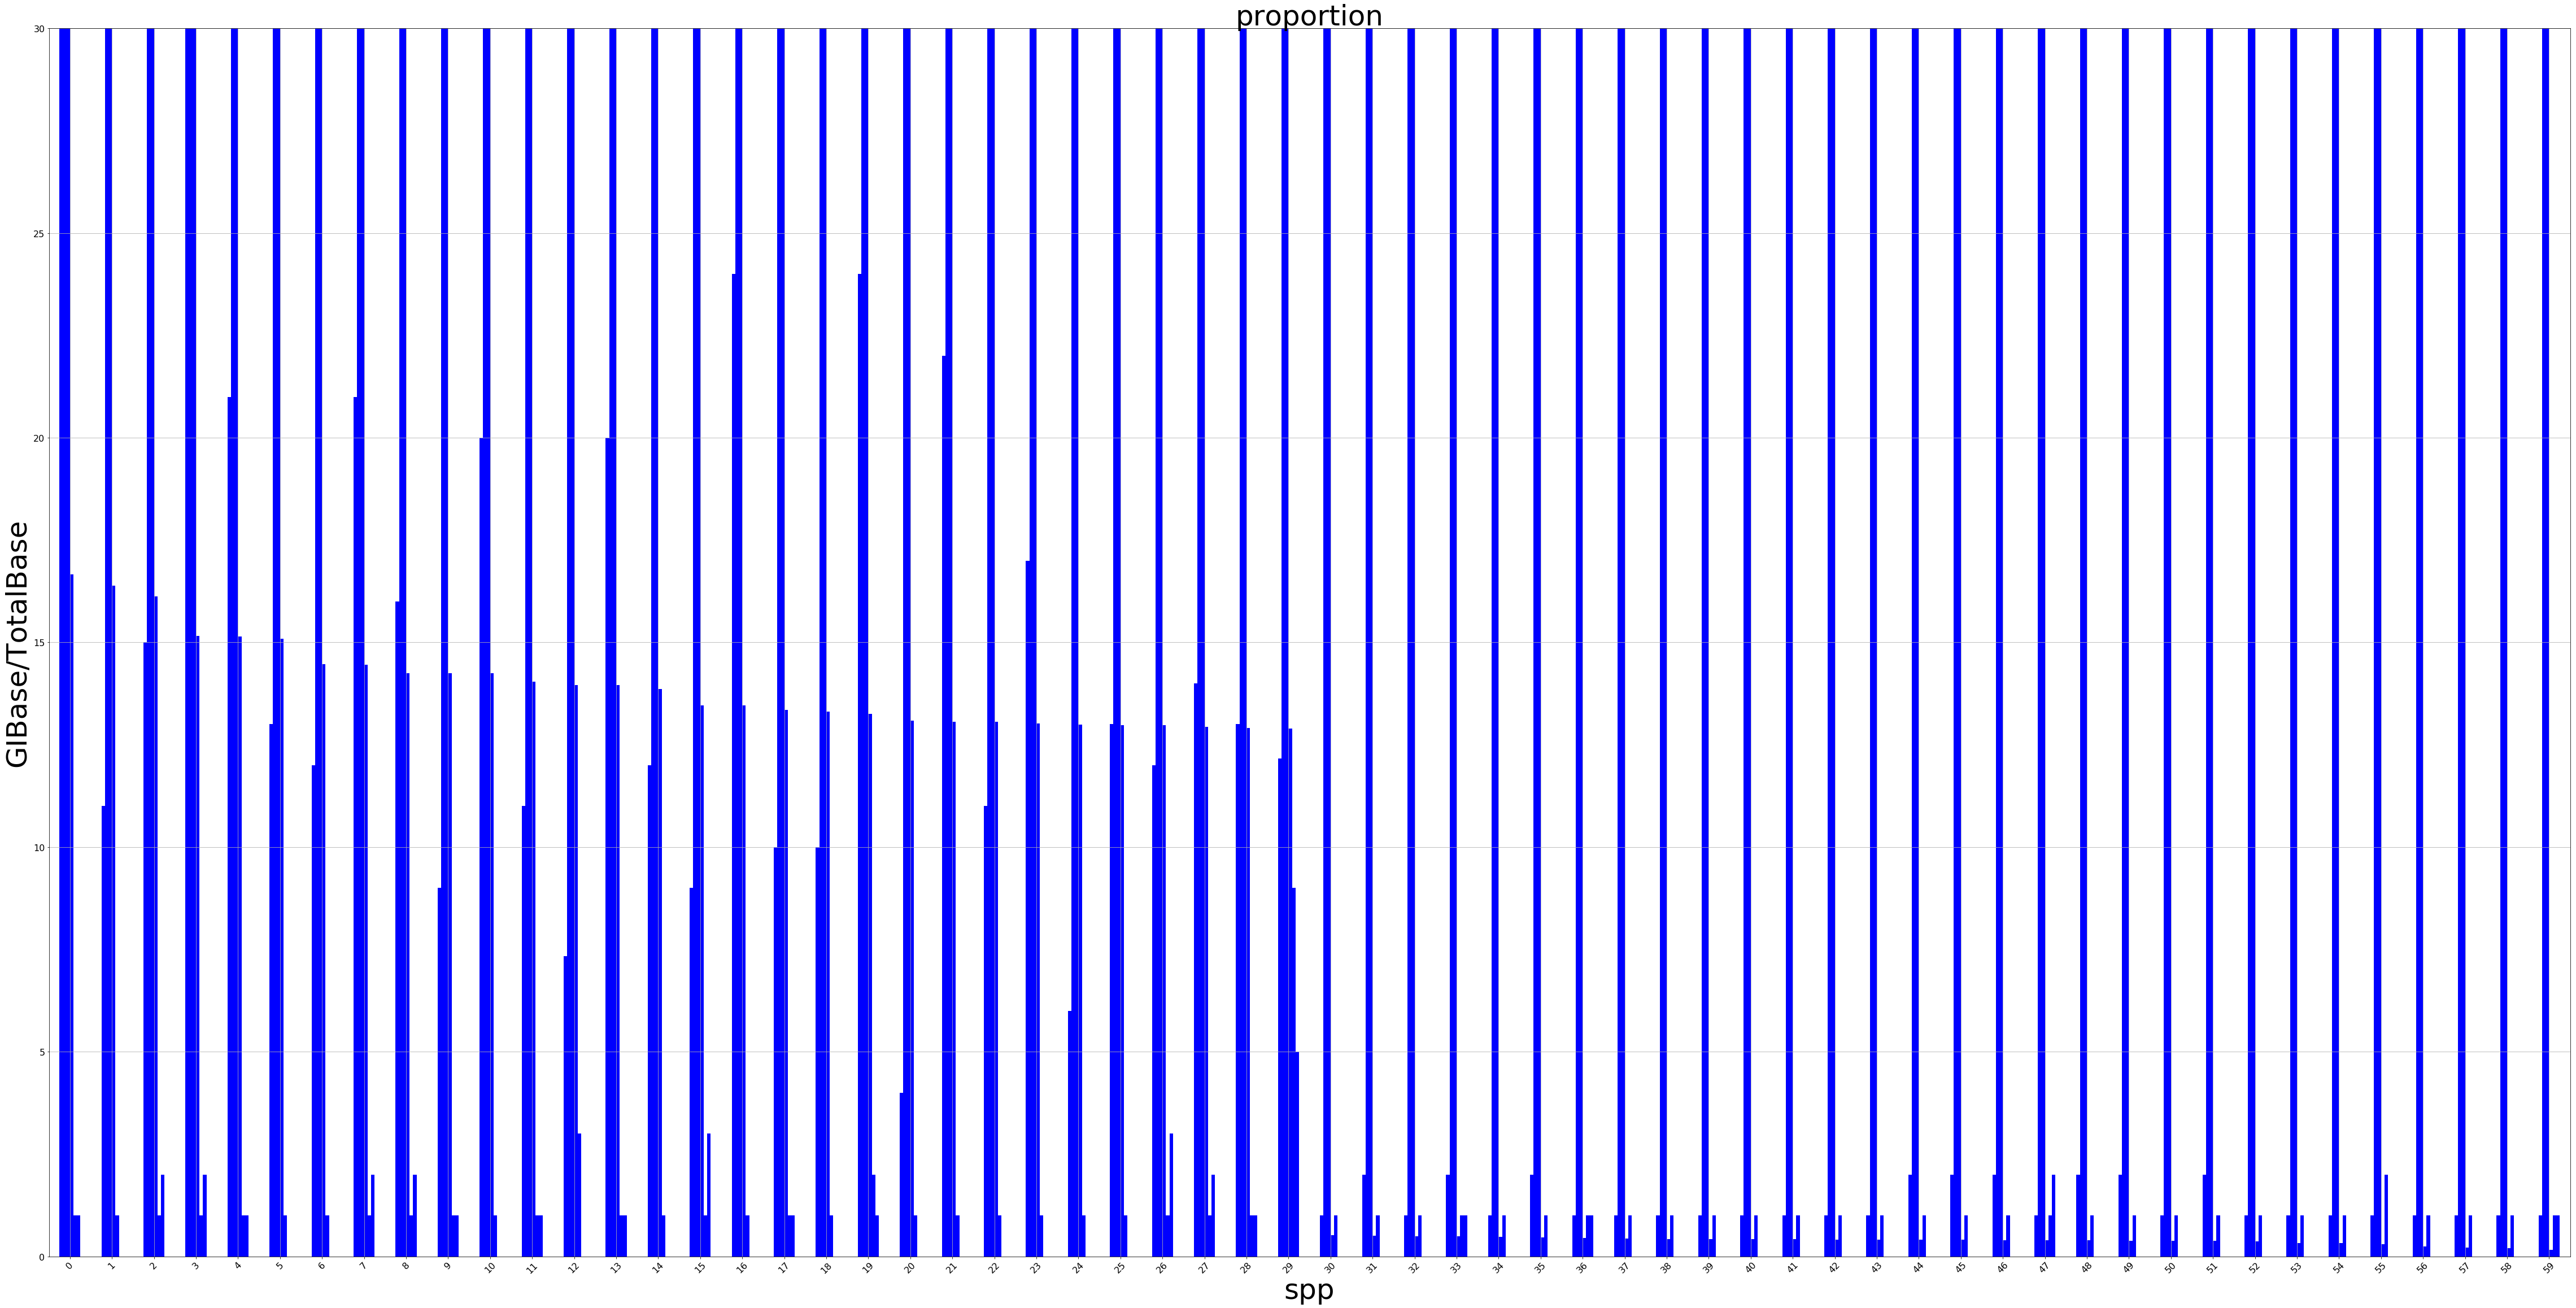

In [12]:
finalFrame = averageFrame.merge(repTypeFrame, left_on = taxonToSortBy, right_on = taxonToSortBy)

finalFrame = finalFrame.sort_values('Proportion', ascending = False).reset_index(drop=True)
finalFrame.to_csv('GIProportion.tsv', sep='\t')

lowest = finalFrame.nsmallest(30, 'Proportion')
highest = finalFrame.nlargest(30, 'Proportion')

newFrame = lowest.append(highest)
newFrame = newFrame.sort_values('Proportion', ascending = False).reset_index(drop=True)
#print(newFrame)

plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.which'] = 'major'
plt.rcParams["axes.grid.axis"] ="y"    
plt.rcParams["font.size"] =150    

p = newFrame.plot(figsize = (80,40),legend=False,kind="bar",rot=45,color="blue",fontsize=16)#,yerr=varCountFrame)
p.set_title("proportion", fontsize=50);
p.set_xlabel("spp", fontsize=50);
p.set_ylabel("GIBase/TotalBase", fontsize=50);
p.set_ylim(0,30);

In [8]:
np.random.lognormal(1,2,30)

array([3.72810094e+00, 3.40019165e-01, 5.41949113e-01, 5.02816730e+01,
       2.24292887e-01, 9.80356247e+00, 2.45595234e+01, 1.10937188e+00,
       4.21757492e-01, 1.04403617e+00, 1.86905482e+01, 4.18596170e+00,
       8.69286697e-01, 8.13405511e+00, 1.80918069e+01, 3.73557041e+00,
       6.35055720e+00, 2.05011286e+00, 1.46616435e-01, 5.93815584e-01,
       6.72371409e+00, 2.66987919e+01, 1.74597363e+00, 1.35753759e-01,
       1.37313818e+02, 2.73609776e+00, 7.62938107e-01, 2.54363403e+01,
       1.02799966e+00, 1.25509007e+00])